In [ ]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import sys 

project_root = Path().cwd()
scripts_dir = project_root / "src" / "scripts"
sys.path.insert(0, str(scripts_dir))

import numpy as np 
import scipy.stats as stats
import scipy.io as io
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import process_2p as p2p
import lick_behav_analysis as behav
import classify_2p as c2p
from scalebars import add_scalebar

#Recording parameters
fps = 15
framespertrial = 375 
ms_per_frame = int(1000//fps)
reward_frame = 150
cue_frame = 105
trials = 30
cmap= "coolwarm"

In [63]:
folder = '/Users/savani/Downloads/2p_data/fed 30 sucrose'
all_avg_f, all_baseline_data, all_aligned_f, all_f = p2p.process_2p_folder(folder, align = 'lick', success = 'success')

(45.0, 180.0)

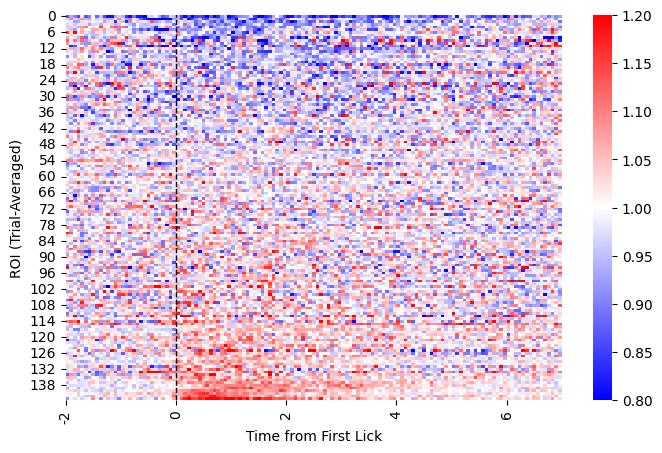

In [41]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(all_avg_f[:, 75:105], axis=1))
sorted_avg_mean = all_avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = all_avg_f.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)


In [ ]:
sucrose_activated_pvals, sucrose_inhibited_pvals, pvals, null_stats, Wobs = c2p.circ_shift(all_f, all_aligned_f, alpha=0.05, base_pre = slice(75, 105), base_post = slice(150, 180),
              stim_pre = slice(75, 105), stim_post = slice(75, 105))



Responsive: 43
Unresponsive: 121
Total: 164
Inhibited: 9
Activated: 34
Number of activated ROIs: 27
Number of inhibited ROIs: 8


In [ ]:
sucrose_activated_pvals, sucrose_inhibited_pvals, pvals, null_stats, Wobs = c2p.circ_shift(all_f, all_aligned_f, alpha=0.05, base_pre = slice(75, 105), base_post = slice(150, 180),
              stim_pre = slice(75, 105), stim_post = slice(75, 105))


Responsive: 38
Unresponsive: 106
Total: 144
Inhibited: 10
Activated: 28
Number of activated ROIs: 15
Number of inhibited ROIs: 0


Text(0.5, 25.722222222222214, 'Time from First Lick')

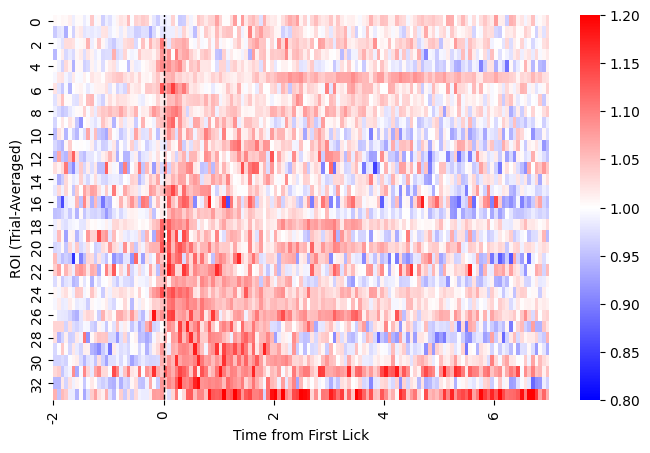

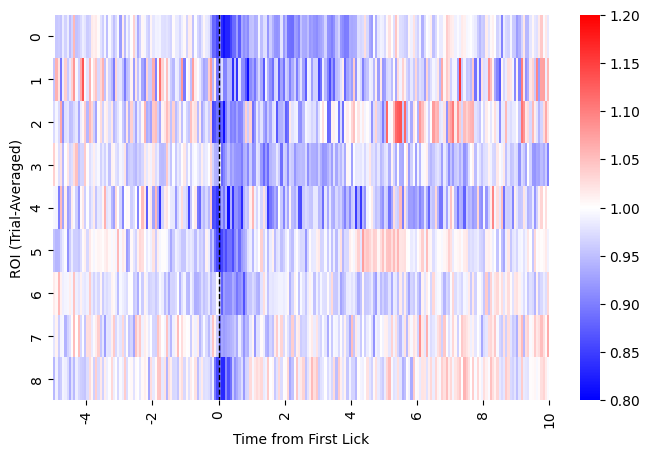

In [59]:
suc_active = all_avg_f[sucrose_activated_pvals <= 0.05, :]
suc_inactive = all_avg_f[sucrose_inhibited_pvals <= 0.05, :]
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(suc_active[:, 75:105], axis=1))
sorted_avg_mean = suc_active[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = suc_active.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(suc_inactive[:, 75:105], axis=1))
sorted_avg_mean = suc_inactive[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = suc_inactive.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")


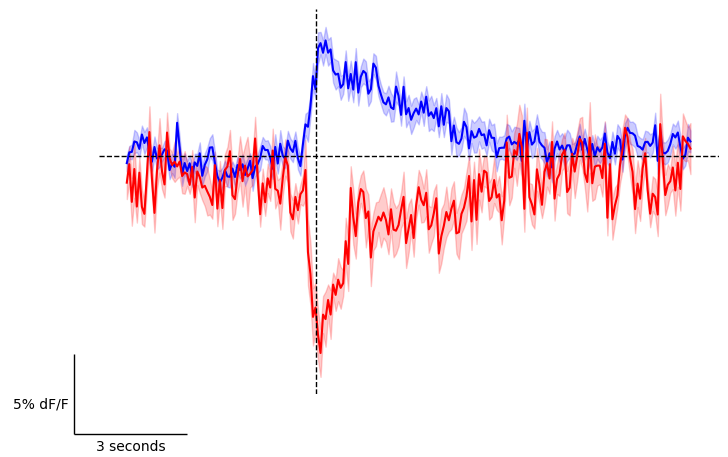

In [60]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_suc_activated = np.nanmean(suc_active, axis=0)
avg_suc_inhibited = np.nanmean(suc_inactive, axis=0)
ax.plot(np.arange(0, 225), avg_suc_activated, color = 'blue', label = 'Activated')
ax.plot(np.arange(0, 225), avg_suc_inhibited, color = 'red', label = 'Inhibited')
ax.fill_between(np.arange(0, 225), avg_suc_activated - stats.sem(suc_active, axis=0), avg_suc_activated + stats.sem(suc_active, axis=0), color = 'blue', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_suc_inhibited - stats.sem(suc_inactive, axis=0), avg_suc_inhibited + stats.sem(suc_inactive, axis=0), color = 'red', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
sb = add_scalebar(ax, matchx=False, sizex=3*15, labelx='3 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))


Text(0.5, 25.722222222222214, 'Time from First Lick')

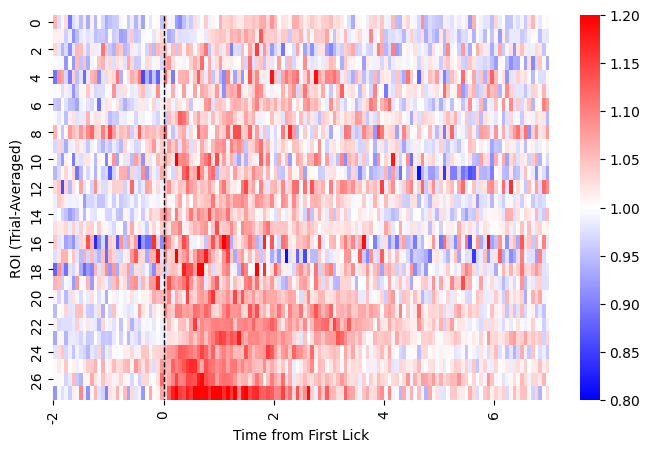

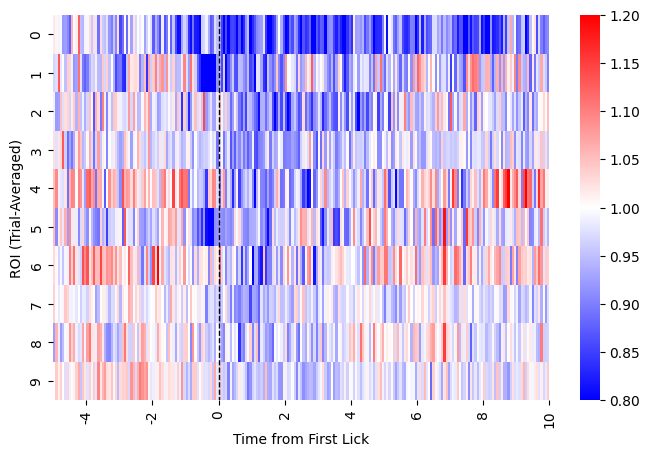

In [65]:
suc_active = all_avg_f[sucrose_activated_pvals <= 0.05, :]
suc_inactive = all_avg_f[sucrose_inhibited_pvals <= 0.05, :]
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(suc_active[:, 75:105], axis=1))
sorted_avg_mean = suc_active[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = suc_active.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(suc_inactive[:, 75:105], axis=1))
sorted_avg_mean = suc_inactive[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = suc_inactive.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")


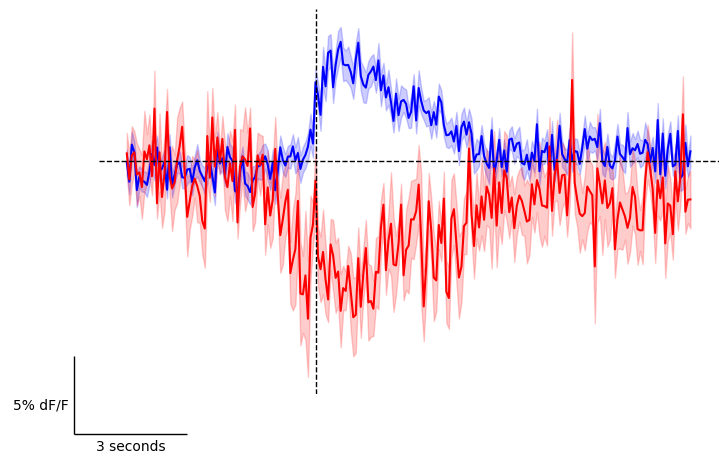

In [51]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_suc_activated = np.nanmean(suc_active, axis=0)
avg_suc_inhibited = np.nanmean(suc_inactive, axis=0)
ax.plot(np.arange(0, 225), avg_suc_activated, color = 'blue', label = 'Activated')
ax.plot(np.arange(0, 225), avg_suc_inhibited, color = 'red', label = 'Inhibited')
ax.fill_between(np.arange(0, 225), avg_suc_activated - stats.sem(suc_active, axis=0), avg_suc_activated + stats.sem(suc_active, axis=0), color = 'blue', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_suc_inhibited - stats.sem(suc_inactive, axis=0), avg_suc_inhibited + stats.sem(suc_inactive, axis=0), color = 'red', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
sb = add_scalebar(ax, matchx=False, sizex=3*15, labelx='3 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

